<a href="https://colab.research.google.com/github/Dima200206/-2/blob/main/%D0%9B%D0%916_%D0%92%D0%BB%D0%B0%D1%81%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота 6
Запобігання перенавчанню. L1 і L2 регулярізація.
Завдання 1. Побудова регресійної моделі та запобігання перенавчанню.
Необхідно побудувати регресійну модель на одному з вбудованих датасетів, доступних у
бібліотеці scikit-learn. Основна мета завдання — навчитися побудові регресійних
моделей та уникненню перенавчання (overfitting) шляхом застосування відповідних
технік.
1. Завантаження та підготовка даних:
o Виберіть вбудований датасет для задачі регресії з бібліотеки scikit-learn
(наприклад, Boston Housing, California Housing) або будь-який датасет
для регресії.
o Завантажте дані та розділіть їх на навчальну та тестову вибірки
(рекомендується використовувати співвідношення 80/20 або 70/30).
2. Побудова регресійної моделі:
o Побудуйте базову лінійну регресійну модель на основі навчальної вибірки.
o Оцініть точність моделі на тестовій вибірці та визначте її продуктивність,
використовуючи метрики якості регресії (наприклад, mean_squared_error,
R^2).
3. Аналіз перенавчання:
o Перевірте наявність перенавчання, порівнюючи результати на навчальній та
тестовій вибірках. Якщо модель показує значно кращі результати на
навчальних даних, це може свідчити про перенавчання.
4. Запобігання перенавчанню:
o Введіть регуляризацію: використайте моделі з регуляризацією, такі як Ridge
Regression або Lasso Regression.
o Перевірте роботу моделі з різними значеннями параметра регуляризації та
виберіть оптимальне значення.
o Застосуйте крос-валідацію для більш стабільної оцінки продуктивності
моделі.
5. Оцінка результатів:
o Оцініть кінцеву продуктивність моделі на тестовій вибірці та порівняйте її з
базовою моделлю.
o Проаналізуйте, як введення регуляризації та використання крос-валідації
вплинули на якість моделі.
6. Візуалізація та висновки:
o Побудуйте графіки, що демонструють залежність помилки моделі від
гіперпараметрів регуляризації.
o Підготуйте звіт з висновками щодо ефективності моделі, заходів щодо
запобігання перенавчанню та загальних результатів.

Linear Regression - Train MSE: 0.5179331255246699, Test MSE: 0.5558915986952442
Linear Regression - Train R^2: 0.6125511913966952, Test R^2: 0.575787706032451
Ridge Regression - Train MSE: 0.5179332184751891, Test MSE: 0.5558548589435971
Lasso Regression - Train MSE: 0.6718399298159435, Test MSE: 0.6796290284328825


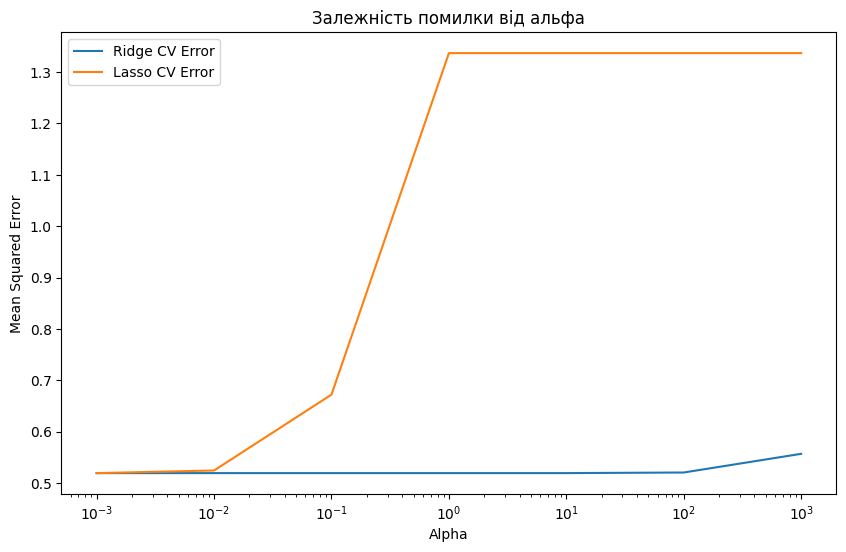

Оптимальне значення alpha для Ridge: 0.1
Оптимальне значення alpha для Lasso: 0.001
Ridge Regression (Best Alpha) - Test MSE: 0.5558879138674184, Test R^2: 0.5757905180002312


In [21]:
# Завантаження необхідних бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Завантаження датасету California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Target")

# Розділення на навчальну та тестову вибірки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Побудова базової лінійної регресійної моделі
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Оцінка точності моделі на тестовій вибірці
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Linear Regression - Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Linear Regression - Train R^2: {train_r2}, Test R^2: {test_r2}")

# 2. Аналіз перенавчання: порівняння метрик для навчальних і тестових даних
# Якщо тестові метрики значно гірші за навчальні, може свідчити про перенавчання.

# 3. Введення регуляризації: Ridge та Lasso регресія
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

# Оцінка моделей
ridge_train_pred = ridge_model.predict(X_train_scaled)
ridge_test_pred = ridge_model.predict(X_test_scaled)
lasso_train_pred = lasso_model.predict(X_train_scaled)
lasso_test_pred = lasso_model.predict(X_test_scaled)

ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

print(f"Ridge Regression - Train MSE: {ridge_train_mse}, Test MSE: {ridge_test_mse}")
print(f"Lasso Regression - Train MSE: {lasso_train_mse}, Test MSE: {lasso_test_mse}")

# Крос-валідація для вибору найкращої моделі з регуляризацією
alphas = np.logspace(-3, 3, 7)
ridge_cv_scores = [cross_val_score(Ridge(alpha=a), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean() for a in alphas]
lasso_cv_scores = [cross_val_score(Lasso(alpha=a), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean() for a in alphas]

# 4. Візуалізація залежності помилки від гіперпараметрів регуляризації
plt.figure(figsize=(10,6))
plt.plot(alphas, np.abs(ridge_cv_scores), label='Ridge CV Error')
plt.plot(alphas, np.abs(lasso_cv_scores), label='Lasso CV Error')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Залежність помилки від альфа')
plt.legend()
plt.show()

# Вибір оптимальної моделі
best_alpha_ridge = alphas[np.argmin(np.abs(ridge_cv_scores))]
best_alpha_lasso = alphas[np.argmin(np.abs(lasso_cv_scores))]
print(f"Оптимальне значення alpha для Ridge: {best_alpha_ridge}")
print(f"Оптимальне значення alpha для Lasso: {best_alpha_lasso}")

# Оцінка кінцевої продуктивності на тестовій вибірці
best_ridge_model = Ridge(alpha=best_alpha_ridge)
best_ridge_model.fit(X_train_scaled, y_train)
final_pred = best_ridge_model.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, final_pred)
final_r2 = r2_score(y_test, final_pred)

print(f"Ridge Regression (Best Alpha) - Test MSE: {final_mse}, Test R^2: {final_r2}")

# Висновки: Як регуляризація та крос-валідація вплинули на модель?


Завдання 2. Виконати кластерізацію даних. Затосувати метод ліктя або метод силуєтів.
Зробити візуалізацію кластерів.
Зробити висновки

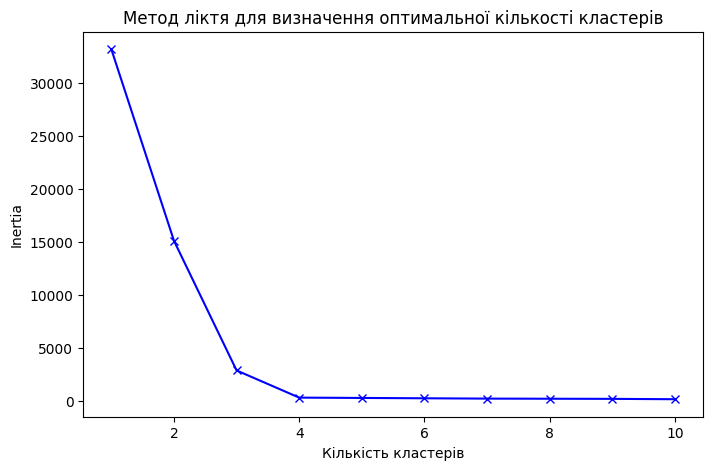

Середнє значення коефіцієнта силуета: 0.8757323158768271


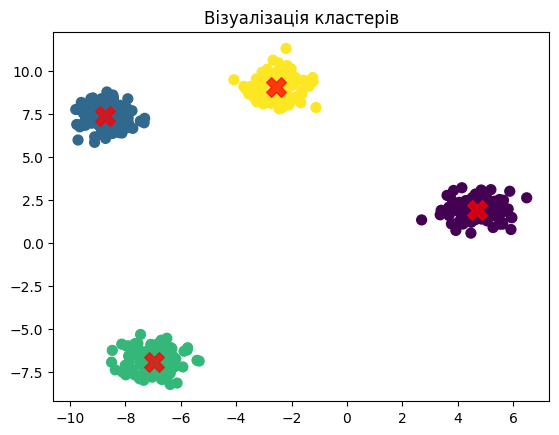

In [22]:
# Завантаження бібліотек для кластеризації
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Створення штучного датасету для кластеризації
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Метод ліктя для визначення оптимальної кількості кластерів
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.show()

# Кластеризація з оптимальною кількістю кластерів (наприклад, 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)

# Оцінка кластеризації методом силуетів
silhouette_avg = silhouette_score(X, clusters)
print(f"Середнє значення коефіцієнта силуета: {silhouette_avg}")

# Візуалізація кластерів
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Візуалізація кластерів')
plt.show()

# Висновки: Проаналізуйте, наскільки якісно відбулося розбиття на кластери
